<a href="https://colab.research.google.com/github/maskot1977/PythonCourse2019/blob/master/Chainer_Caffe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/BVLC/caffe/wiki/Model-Zoo

In [1]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
import urllib.request 
# ウェブ上のリソースを指定する
url = 'https://s3.amazonaws.com/jgoode/oxford102.caffemodel'
# 指定したURLからリソースをダウンロードし、名前をつける。
urllib.request.urlretrieve(url, 'oxford102.caffemodel') 

('oxford102.caffemodel', <http.client.HTTPMessage at 0x7ff854b81b00>)

In [2]:
from chainer.links import caffe
func = caffe.CaffeFunction('oxford102.caffemodel')

/usr/local/lib/python3.6/dist-packages/chainer/links/caffe/caffe_function.py:174: UserWarning: Skip the layer "data", since CaffeFunction does not support it
  'support it' % layer.name)


/usr/local/lib/python3.6/dist-packages/chainer/links/caffe/caffe_function.py:174: UserWarning: Skip the layer "data", since CaffeFunction does not support it
  'support it' % layer.name)


1 	 carnation 	 0.6862433
2 	 wallflower 	 0.075164974
3 	 corn poppy 	 0.057577945
4 	 hibiscus 	 0.037174866
5 	 great masterwort 	 0.033413775


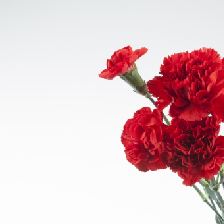

In [3]:
import urllib.request 
from PIL import Image
import numpy as np
import chainer
import chainer.functions as F

filename = "whatisyourname.jpg"
def guess_flower_name(url, filename=filename):
    labels = ['pink primrose', 'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea', 
              'english marigold', 'tiger lily', 'moon orchid', 'bird of paradise', 'monkshood', 
              'globe thistle', 'snapdragon', "colt's foot", 'king protea', 'spear thistle', 
              'yellow iris', 'globe-flower', 'purple coneflower', 'peruvian lily', 'balloon flower', 
              'giant white arum lily', 'fire lily', 'pincushion flower', 'fritillary', 'red ginger', 
              'grape hyacinth', 'corn poppy', 'prince of wales feathers', 'stemless gentian', 
              'artichoke', 'sweet william', 'carnation', 'garden phlox', 'love in the mist', 
              'mexican aster', 'alpine sea holly', 'ruby-lipped cattleya', 'cape flower', 
              'great masterwort', 'siam tulip', 'lenten rose', 'barbeton daisy', 'daffodil', 
              'sword lily', 'poinsettia', 'bolero deep blue', 'wallflower', 'marigold', 
              'buttercup', 'oxeye daisy', 'common dandelion', 'petunia', 'wild pansy', 
              'primula', 'sunflower', 'pelargonium', 'bishop of llandaff', 'gaura', 'geranium', 
              'orange dahlia', 'pink-yellow dahlia?', 'cautleya spicata', 'japanese anemone', 
              'black-eyed susan', 'silverbush', 'californian poppy', 'osteospermum', 
              'spring crocus', 'bearded iris', 'windflower', 'tree poppy', 'gazania', 'azalea', 
              'water lily', 'rose', 'thorn apple', 'morning glory', 'passion flower', 'lotus', 
              'toad lily', 'anthurium', 'frangipani', 'clematis', 'hibiscus', 'columbine', 
              'desert-rose', 'tree mallow', 'magnolia', 'cyclamen ', 'watercress', 'canna lily', 
              'hippeastrum ', 'bee balm', 'ball moss', 'foxglove', 'bougainvillea', 'camellia', 
              'mallow', 'mexican petunia', 'bromelia', 'blanket flower', 'trumpet creeper', 
              'blackberry lily']
    urllib.request.urlretrieve(url, filename)
    image = Image.open(filename).convert('RGB')
    w, h = image.size
    fixed_w, fixed_h = 224, 224
    if w > h:
        shape = (int(fixed_w * w / h), fixed_h)
    else:
        shape = (fixed_w, int(fixed_h * h / w))

    left = (shape[0] - fixed_w) / 2
    right = left + fixed_w
    top = (shape[1] - fixed_h) / 2
    bottom = top + fixed_h

    image = image.resize(shape)
    image = image.crop((left, top, right, bottom)) 

    x_data = np.asarray(image).astype(np.float32)
    x_data = x_data.transpose(2, 0, 1)
    x_data = x_data[::-1, :, :]

    mean_image = np.zeros(3*fixed_w*fixed_h).reshape(3, fixed_w, fixed_h).astype(np.float32)
    mean_image[0] = 103
    mean_image[1] = 117
    mean_image[2] = 123

    x_data -= mean_image
    x_data = np.array([x_data])

    x = chainer.Variable(x_data)
    func = caffe.CaffeFunction('oxford102.caffemodel')
    y, = func(inputs={'data': x}, outputs=['fc8_oxford_102'])

    prob = F.softmax(y)

    for i in range(5):
        idx = np.argsort(prob.data[0])[::-1][i]
        print(i + 1, "\t", labels[idx], "\t", prob.data[0][idx])

    return image

guess_flower_name('https://d1f5hsy4d47upe.cloudfront.net/93/936a7824f1041bfef2cbe7d96c1fc7cc_t.jpeg')

/usr/local/lib/python3.6/dist-packages/chainer/links/caffe/caffe_function.py:174: UserWarning: Skip the layer "data", since CaffeFunction does not support it
  'support it' % layer.name)


1 	 carnation 	 0.56166863
2 	 sword lily 	 0.4131709
3 	 camellia 	 0.0039400724
4 	 bearded iris 	 0.003937593
5 	 ruby-lipped cattleya 	 0.003253354


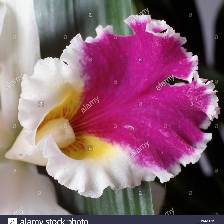

In [4]:
url = "https://c8.alamy.com/comp/HMWBKR/crimson-cattleya-or-ruby-lipped-cattleya-cattleya-labiata-candida-HMWBKR.jpg"
guess_flower_name(url)